#### Studying Analytics (Edx Course)
___

__Date Started:__  
__Nov 23, 2018__  

__Introduction:__  
__The course is intended as an introductory tool for data Analysis using R Programming language__  
__Unit : 2__  (Assignment no 3)


__Content__:
* Linear Regression testing google trends data to determine the trend of Viral Influenza
* ILI (Influenza Like Illness) data is published by CDC 
* normalized search query for flu symptoms is given by google.


__links:__  
* google trends : https://www.google.com/trends


In [17]:
flu_train = read.csv('FluTrain.csv')
flu_test  = read.csv('FluTest.csv')

In [18]:
str(flu_train)
wk = flu_train$Week[1]

'data.frame':	417 obs. of  3 variables:
 $ Week   : Factor w/ 417 levels "2004-01-04 - 2004-01-10",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ILI    : num  2.42 1.81 1.71 1.54 1.44 ...
 $ Queries: num  0.238 0.22 0.226 0.238 0.224 ...


In [19]:
max_flu_index = which.max(flu_train$ILI)
flu_train[max_flu_index, ]
max_flu_search_index = which.max(flu_train$Queries)
flu_train[max_flu_search_index, ]

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


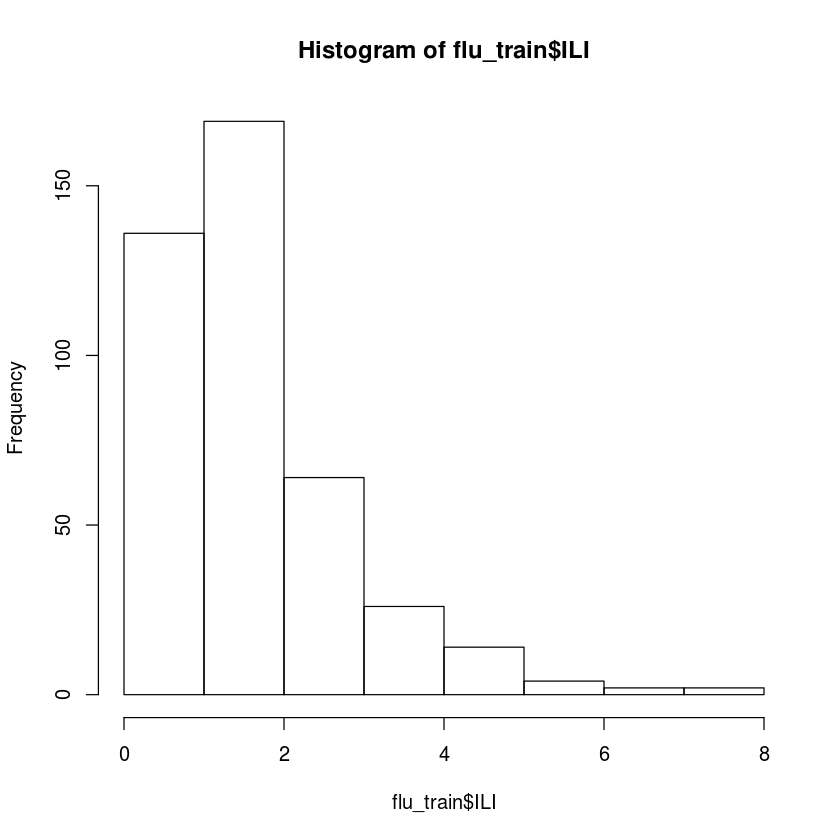

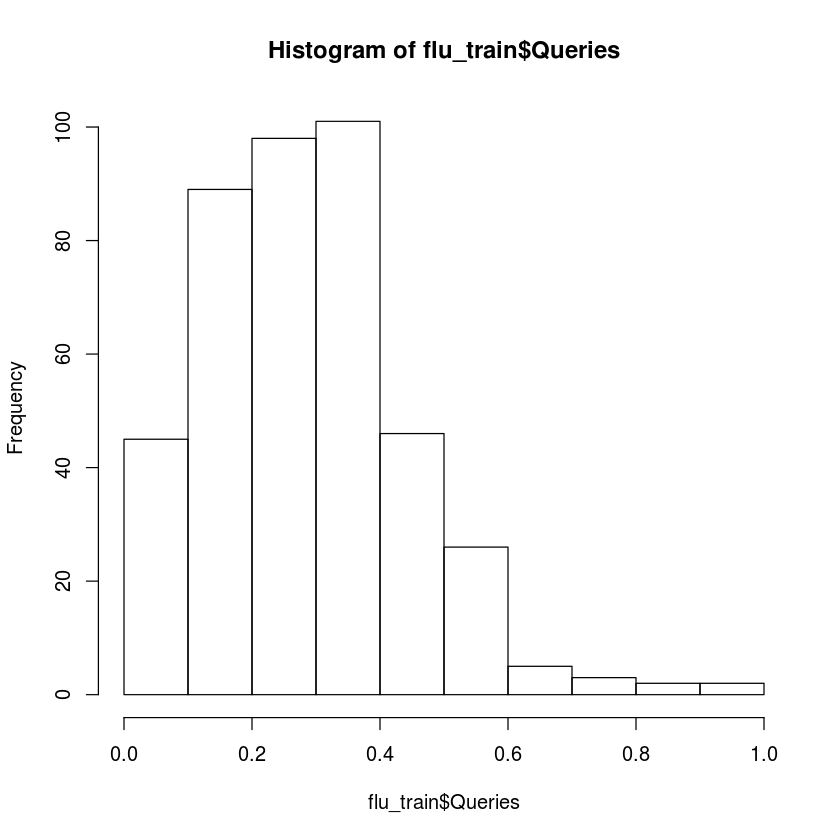

In [20]:
hist(flu_train$ILI)
hist(flu_train$Queries)

In [21]:
flu_train$logILI = log(flu_train$ILI)

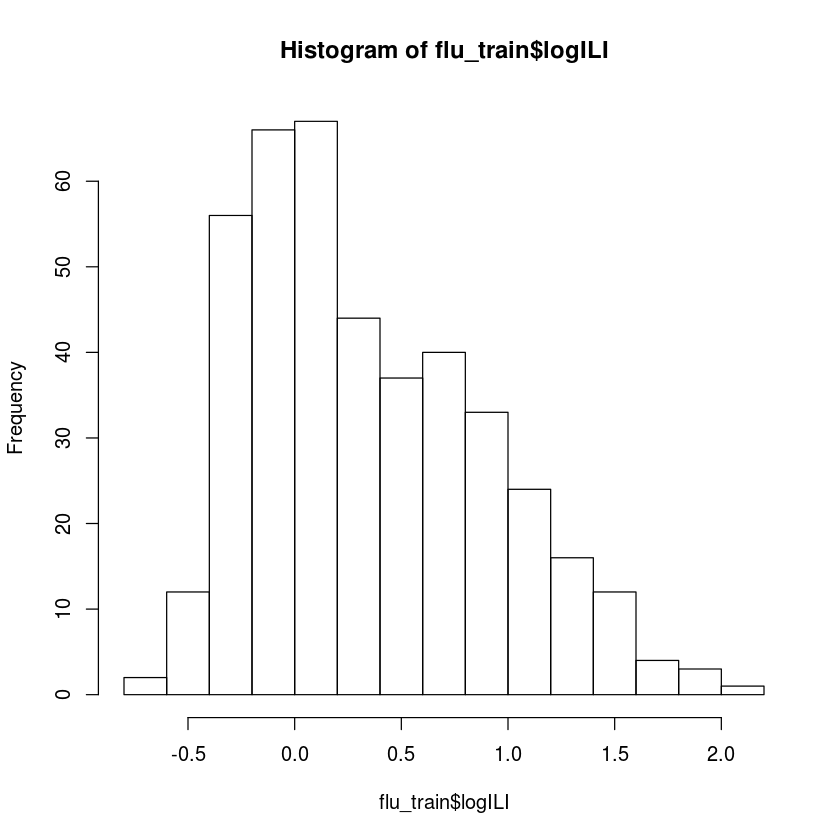

In [22]:
hist(flu_train$logILI)

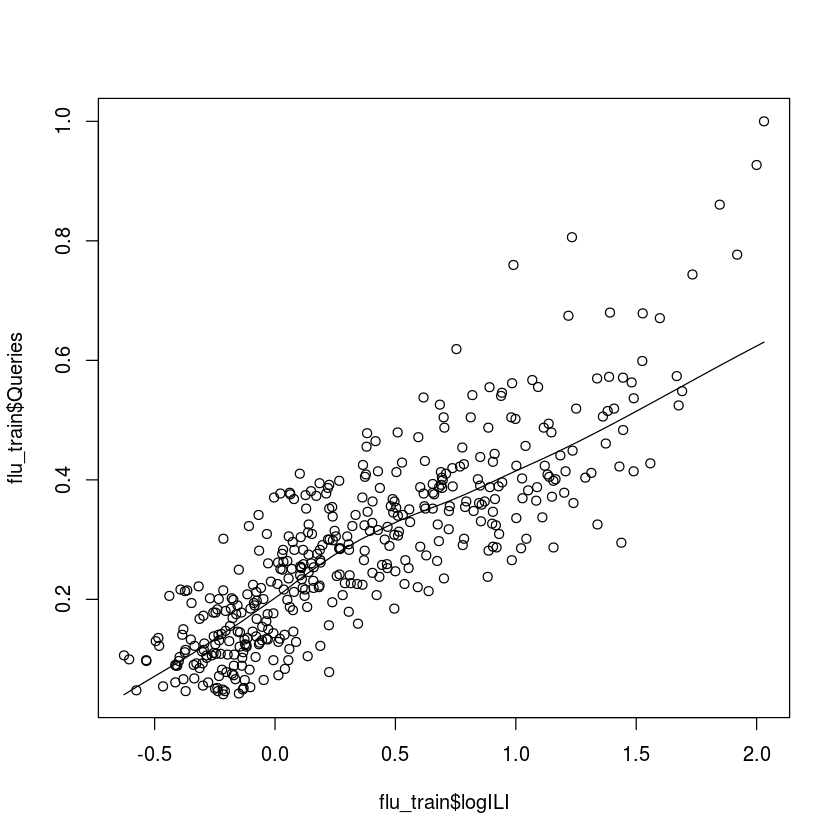

In [23]:
scatter.smooth(flu_train$logILI, flu_train$Queries)

In [24]:
# creating a linear regression model 

reg_model = lm(formula = logILI ~ Queries , data=flu_train)
summary(reg_model)


Call:
lm(formula = logILI ~ Queries, data = flu_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


In [25]:
# calculating correlation 

cor_ili_queries = cor(flu_train$logILI, flu_train$Queries)
cor_ili_queries^2
log(1/cor_ili_queries)
exp(-0.5*cor_ili_queries)

[1] 0.7090201

[1] 0.1719357

[1] 0.6563792

In [26]:
# March 11, 2012
prediction_queries = predict(reg_model, newdata = flu_test)
prediction_ili = exp(prediction_queries)
prediction_ili[11]


11 
2.187378

In [27]:
# error calculation 

errors = (flu_test$ILI[11] - prediction_ili[11]) / flu_test$ILI[11]

errors

11 
0.04623827

In [28]:
# rms error calculation 


rmse = sqrt(mean((prediction_ili - flu_test$ILI)^2))
rmse

[1] 0.7490645

In [29]:

# install.packages('zoo')
# library(zoo)

In [30]:

ili_lag2 = lag(zoo(flu_test$ILI), -15, na.pad=TRUE)
flu_test$ili_lag2 = ili_lag2

flu_test

Week,ILI,Queries,ili_lag2
2012-01-01 - 2012-01-07,1.7667069,0.5936255,NA
2012-01-08 - 2012-01-14,1.5434005,0.4993360,NA
2012-01-15 - 2012-01-21,1.6476154,0.5006640,NA
2012-01-22 - 2012-01-28,1.6842972,0.4794157,NA
2012-01-29 - 2012-02-04,1.8635415,0.4714475,NA
2012-02-05 - 2012-02-11,1.8640793,0.5033201,NA
2012-02-12 - 2012-02-18,2.0199272,0.5139442,NA
2012-02-19 - 2012-02-25,2.1038510,0.5006640,NA
2012-02-26 - 2012-03-03,2.0955493,0.4608234,NA
2012-03-04 - 2012-03-10,2.1039832,0.4581673,NA


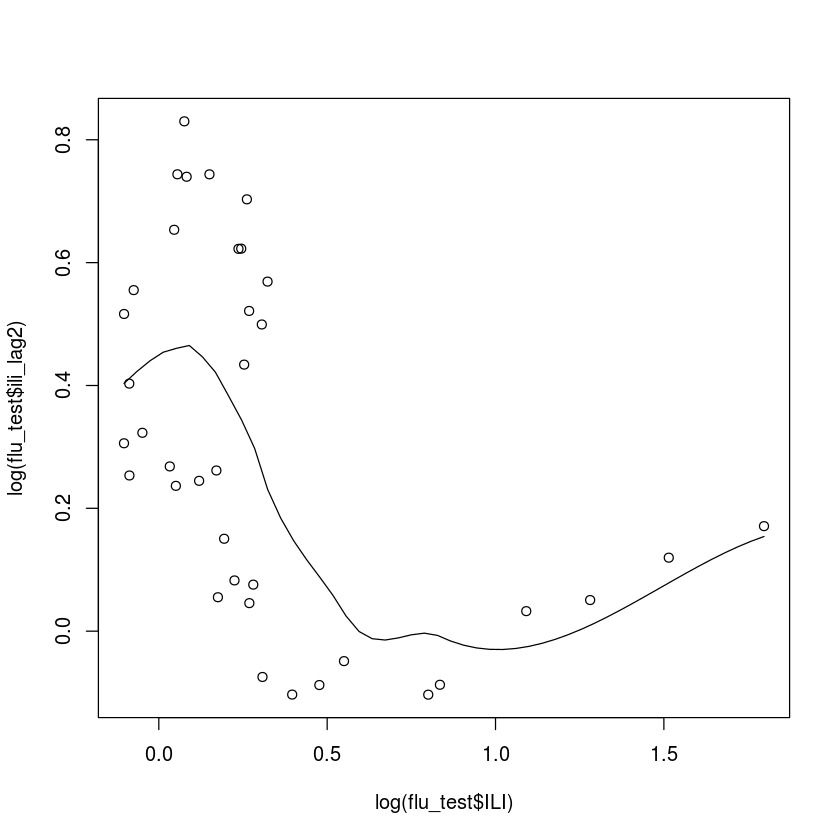

In [31]:
# solution to problem 4.2

scatter.smooth(log(flu_test$ILI), log(flu_test$ili_lag2))

In [32]:
flu_trend = lm(formula = log(ILI) ~ Queries + log(ili_lag2), data=flu_test)
summary(flu_trend)

# plot(flu_trend)


Call:
lm(formula = log(ILI) ~ Queries + log(ili_lag2), data = flu_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23660 -0.05633 -0.01097  0.07835  0.32978 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.17867    0.08984 -13.119 7.33e-15 ***
Queries        3.39805    0.16796  20.231  < 2e-16 ***
log(ili_lag2)  0.61411    0.09286   6.614 1.39e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.114 on 34 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.9356 
F-statistic: 262.6 on 2 and 34 DF,  p-value: < 2.2e-16
